<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/cursive_DL_LR_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 세트 읽기

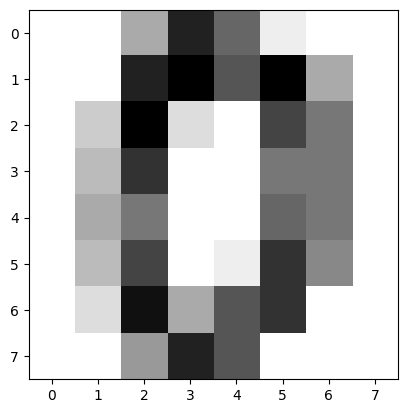

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')


# 이미지 평탄화

In [ ]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# 테스트 데이터로 예측해본다.
y_pred = knn.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9861111111111112


---

# 결정트리

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

#객체 생성
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# 과적합 제어
max_depth=5 # 트리의 최대 깊이를 5로 제한하여 과적합 방지
random_state=42 # 매번 동일한 결과를 얻기 위해 난수 시드 고정
# model_tuned = DecisionTreeClassifier(max_depth=5, random_state=42) # Remove unused DecisionTreeClassifier

model.fit(X_train, y_train)

# 예측
y_preds = model.predict(X_test) # Predict using the DecisionTreeRegressor model (odel)

# 평가
mse = mean_squared_error(y_test, y_preds)
print(f'DecisionTreeRegressor MSE: {mse:.4f}') # Change print statement to reflect Regressor and MSE

DecisionTreeRegressor MSE: 2.5633


Text(0.5, 1.0, 'Decision Tree Regression')

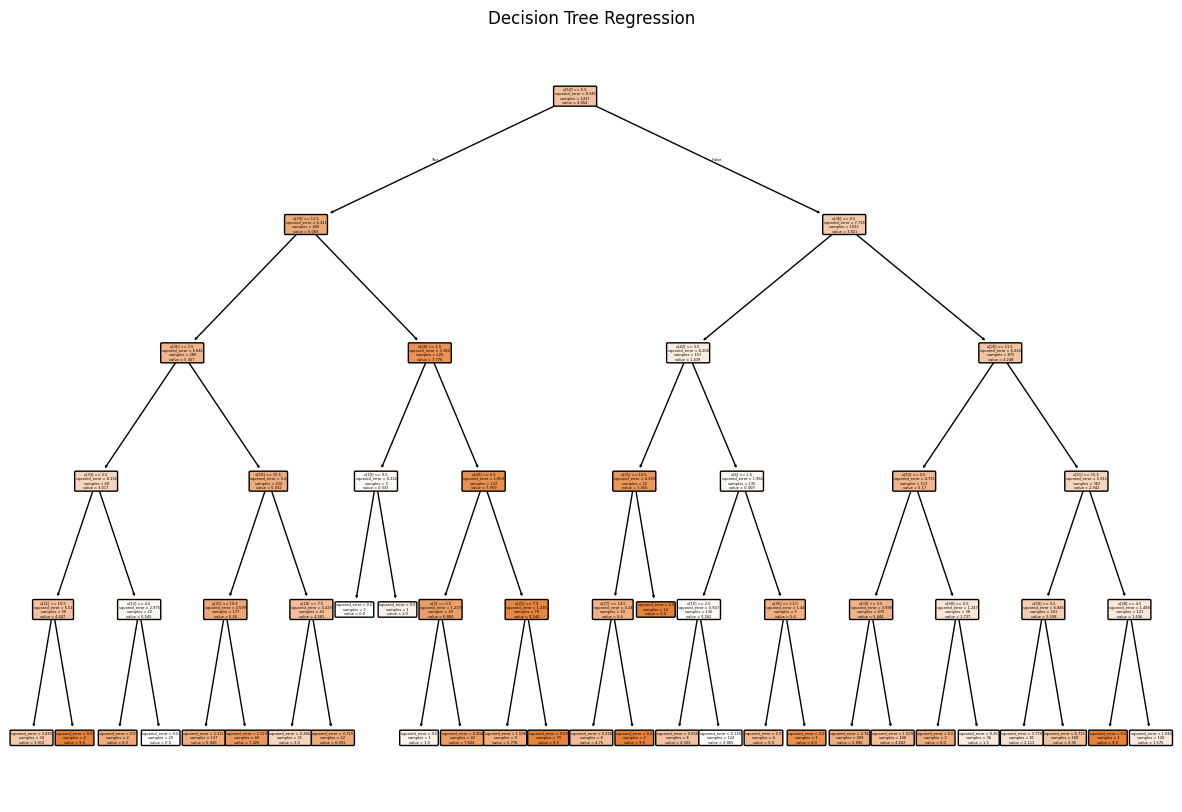

In [ ]:
# 트리 시각화
# plt.figure(figsize=(15, 10)) # 이미지 크기 설정 (plt.subplots에서 처리)
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(15, 10)) # 그림과 축을 명시적으로 생성

plot_tree(model,
          # feature_names=X.columns.tolist(), # 판매 데이터의 특성 이름 사용
          # class_names는 회귀 트리에는 필요하지 않습니다.
          filled=True, # 노드 색상 채우기
          rounded=True, # 노드 모서리 둥글게 처리
          ax=ax) # 생성한 축 객체를 plot_tree에 전달

plt.title("Decision Tree Regression") # 제목 수정

# 랜덤포레스트

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 1. 데이터 준비 및 분할
iris = load_iris()
X = iris.data
y = iris.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 랜덤 포레스트 분류 모델 객체 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. 예측 및 평가
y_preds = model.predict(X_test)

# 정확도(Accuracy) 계산 및 출력
accuracy = accuracy_score(y_test, y_preds)
print(f'Random Forest Classifier Accuracy: {accuracy:.4f}')

Random Forest Classifier Accuracy: 1.0000


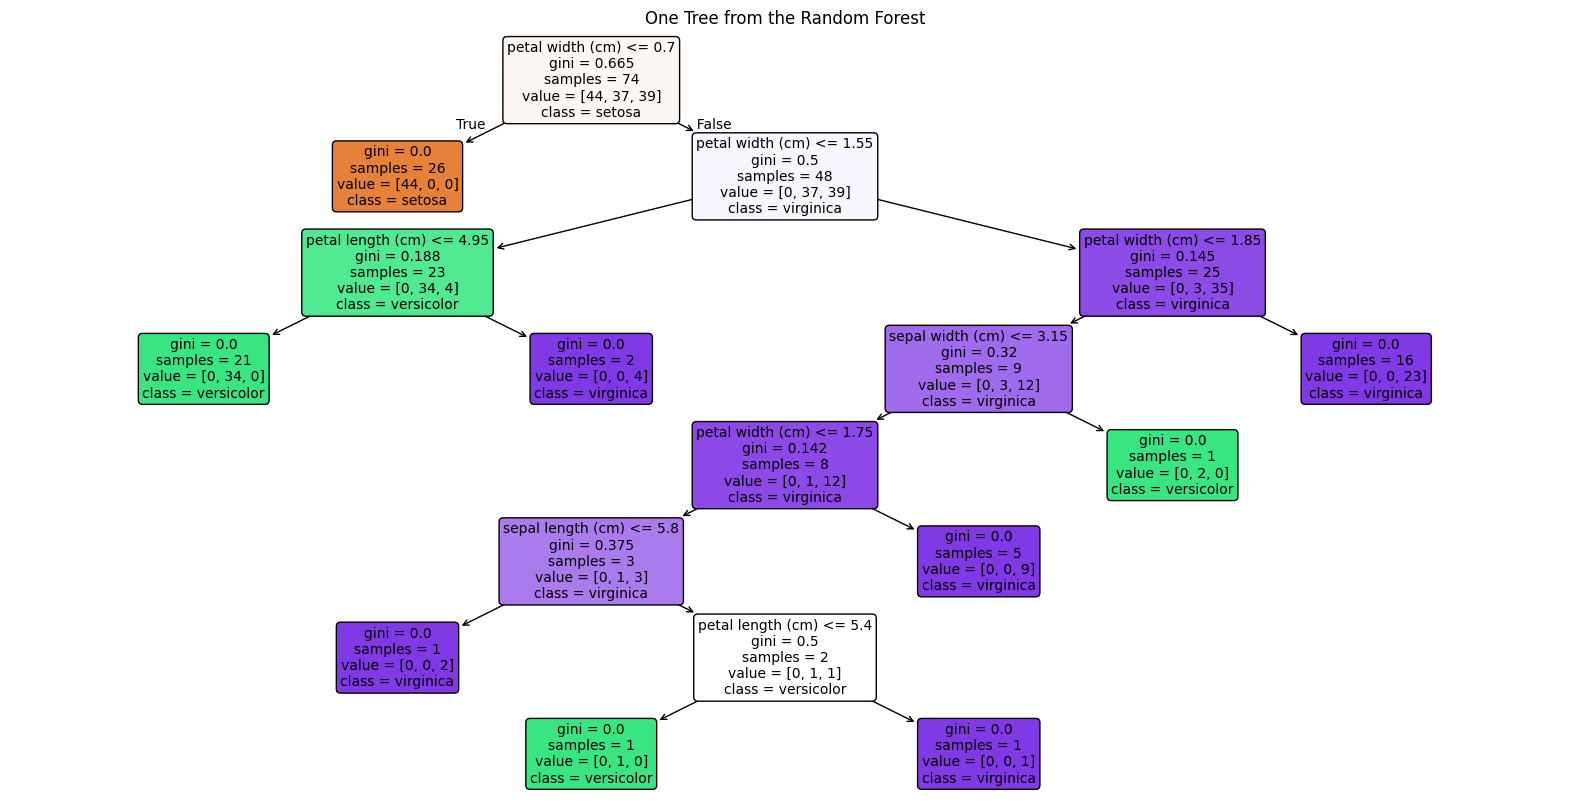

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize one of the trees from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0],
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("One Tree from the Random Forest")
plt.show()

# 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')

Logistic Regression Accuracy: 1.0000
